# Steepest Descent Algorithm

The steepest descent algorithm is a method for finding the minimum point of a multivariable function. It involves calculating the gradient at the current approximation and moving in the opposite direction. The parameter $\alpha$ determines how big each step is. Making $\alpha$ too large may cause the algorithm to overstep and diverge/oscillate. On the other hand, making $\alpha$ too small results in huge number of iterations for convergence.

$$ \boldsymbol{x_{k+1}} = \boldsymbol{x_k} - \alpha \nabla f (\boldsymbol{x_k}) $$

Similar to how bisection can be used for a couple iterations before Newton-Raphson in one dimension, the steepest descent algorithm to find a suitable starting point for the $n$-dimensional Newton's method.

Of course, we can use the steepest ascent algorithm to find maxima by simply reversing the sign of the gradient.

In [1]:
from newton import steepest_descent, steepest_descent_with_line_search

from time import perf_counter

import numpy as np

We will test the steepest descent algorithm and the steepest descent algorithm with line search.

In [2]:
def testing_steepest_descent(func, initial_guess, alpha=0.1):
    start = perf_counter()
    solution = steepest_descent(func, initial_guess, alpha=alpha, require_conv=True, history=True)
    end = perf_counter()

    print(f"Solution: {solution[-1]}")
    print(f"Converged in {len(solution)-1} iterations")
    print(f"Time taken: {end - start:.6f} seconds")

In [3]:
def testing_steepest_descent_with_line_search(func, initial_guess):
    start = perf_counter()
    solution = steepest_descent_with_line_search(func, initial_guess, require_conv=False, history=True, max_iter = 10000)
    end = perf_counter()

    print(f"Solution: {solution[-1]}")
    print(f"Converged in {len(solution)-1} iterations")
    print(f"Time taken: {end - start:.6f} seconds")

Example 1:

\begin{equation*}
f_1(x_1, x_2, ..., x_n) = \sum^n_{i=1} x_i^2.
\end{equation*}

This has a global minimum at (0, 0).

In [4]:
def func_1(x):
    result = 0
    for i in range(len(x)):
        result += x[i]**2
    return result

We test both algorithms for the 5-dimensional case, with an initial guess (1, 1, 1, 1, 1).

In [5]:
testing_steepest_descent(func_1, [1, 1, 1, 1, 1])

Solution: [4.01734511e-07 4.01734511e-07 4.01734511e-07 4.01734511e-07
 4.01734511e-07]
Converged in 66 iterations
Time taken: 0.002384 seconds


In [6]:
testing_steepest_descent_with_line_search(func_1, [1, 1, 1, 1, 1])

Solution: [-6.55120402e-12 -6.55120402e-12 -6.55120402e-12 -6.55120402e-12
 -6.55120402e-12]
Converged in 1 iterations
Time taken: 0.000247 seconds


We plot the two-dimensional case for illustration.

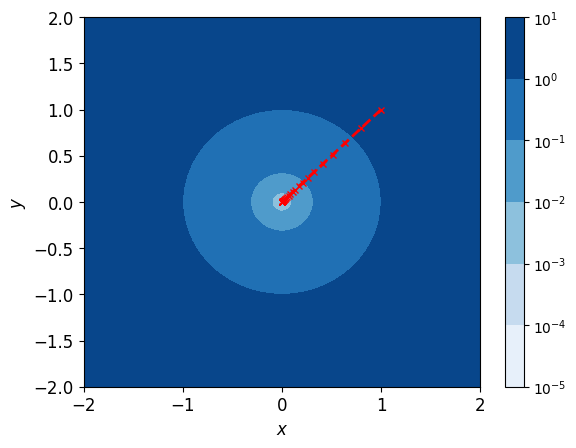

In [7]:
import matplotlib.pyplot as plt
from matplotlib import ticker

solution = steepest_descent(func_1, [1, 1], history=True)

x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot()

cs = ax.contourf(
	X, Y, func_1([X, Y]),
	levels=100,
	cmap="Blues",
	locator=ticker.LogLocator()
)
cbar = fig.colorbar(cs)

ax.plot(solution[:,0], solution[:, 1], color="red", marker="x", markersize=5, linewidth=2, linestyle="--")
ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$y$", fontsize=12)

ax.tick_params(labelsize=12)

plt.show()

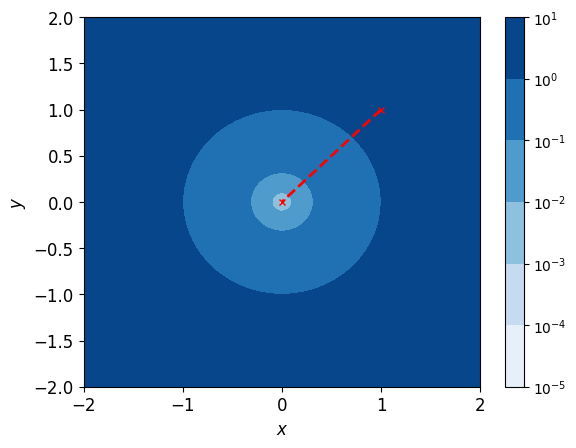

In [8]:
import matplotlib.pyplot as plt
from matplotlib import ticker

solution_with_line_search = steepest_descent_with_line_search(func_1, [1, 1], history=True)

x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot()

cs = ax.contourf(
	X, Y, func_1([X, Y]),
	levels=100,
	cmap="Blues",
	locator=ticker.LogLocator()
)
cbar = fig.colorbar(cs)

ax.plot(solution_with_line_search[:,0], solution_with_line_search[:, 1], color="red", 
        marker="x", markersize=5, linewidth=2, linestyle="--")
ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$y$", fontsize=12)

ax.tick_params(labelsize=12)

plt.show()

Example 2:

\begin{equation*}
	f_2(x, y) = 5x^2 + y^2 + 4xy - 14x - 6y + 20
\end{equation*}

This has a global minimum at (1, 1).

In [9]:
def func_2(x):
    return 5*x[0]**2 + x[1]**2 + 4*x[0]*x[1] - 14*x[0] -6*x[1] + 20

We test both algorithms with an initial guess of (3, 3).

In [10]:
testing_steepest_descent(func_2, [3, 3])

Solution: [0.99999883 1.00000282]
Converged in 366 iterations
Time taken: 0.004808 seconds


In [11]:
testing_steepest_descent_with_line_search(func_2, [3, 3])

Solution: [0.9999993  1.00000184]
Converged in 200 iterations
Time taken: 0.007848 seconds


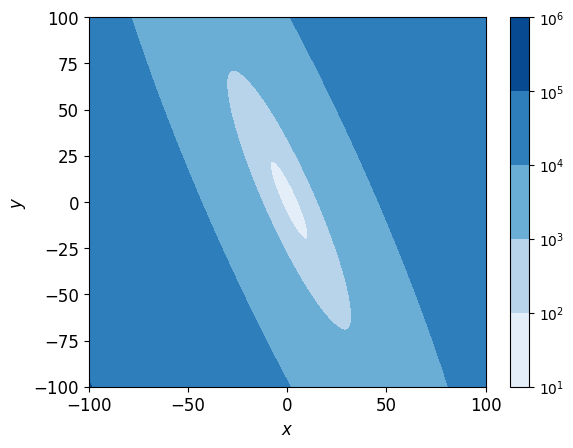

In [12]:
import matplotlib.pyplot as plt
from matplotlib import ticker

x = np.linspace(-100, 100, 300)
y = np.linspace(-100, 100, 300)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot()

cs = ax.contourf(
	X, Y, func_2([X, Y]),
	levels=100,
	cmap="Blues",
	locator=ticker.LogLocator()
)
cbar = fig.colorbar(cs)

ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$y$", fontsize=12)

ax.tick_params(labelsize=12)

plt.show()


Example 3:

\begin{equation*}
	f_3(x, y) = e^{x^2 + y^2}
\end{equation*}

This has a global minimum at (0, 0).

In [13]:
def func_3(x):
    return np.exp(x[0]**2 + x[1]**2)

We test the two algorithms with an inital guess of (1, 1).

In [15]:
testing_steepest_descent(func_3, [1, 1])

Solution: [-4.33876158e-07 -4.33876158e-07]
Converged in 62 iterations
Time taken: 0.001325 seconds


In [16]:
testing_steepest_descent_with_line_search(func_3, [1, 1])

Solution: [1.01022593e-11 1.01022593e-11]
Converged in 4 iterations
Time taken: 0.000903 seconds


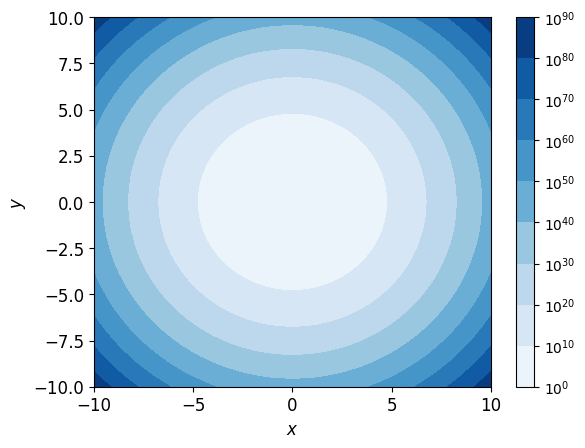

In [14]:
from matplotlib import ticker

x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot()

cs = ax.contourf(
	X, Y, func_3([X, Y]),
	levels=100,
	cmap="Blues",
	locator=ticker.LogLocator()
)
cbar = fig.colorbar(cs)

ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$y$", fontsize=12)

ax.tick_params(labelsize=12)

plt.show()